In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.cluster import KMeans

2023-01-10 15:27:34.045198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# from keras.datasets import mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x = np.concatenate((x_train, x_test))
# y = np.concatenate((y_train, y_test))
# x = x.reshape((x.shape[0], -1))
# x = np.divide(x, 255.)

# print(len(x))

70000


In [24]:
folders = ['yes', 'no']
exclude = ['.ipynb_checkpoints', '.DS_Store']
images = []

cluster_center = []
labels = []
ratio = []

n_clusters = 2

# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20)

for folder in folders:
    for image in os.listdir(f'./BrainTumorsData/brain_tumor_dataset/{folder}')[0:5]:
        if image not in exclude:
            # print(image)
            img = tf.keras.utils.load_img(f'./BrainTumorsData/brain_tumor_dataset/{folder}/{image}')
            img_array = tf.keras.utils.img_to_array(img)
            # img_array = np.array([img_array])
            # img_array = img_array.flatten()
            x, y, z = img_array.shape
            img_2d = img_array.reshape(x*y, z)
            # img_array = img_array.reshape((img_array.shape[0], -1))
            # img_array = np.divide(img_array, 255.)
            pred = kmeans.fit(img_2d)
            cluster_center.append(pred.cluster_centers_)
            labels.append(pred.labels_)
            ratio.append({x, y, z})
            # images.append(pred)

print(len(cluster_center))
print(len(labels))

9
9


In [25]:
print(ratio)
x, y, z = ratio[0]
print(x, y, z)

[{938, 3, 911}, {256, 3}, {3, 586, 467}, {512, 3}, {320, 3, 355}, {1080, 3, 1920}, {361, 642, 3}, {512, 3}, {225, 3}]
938 3 911


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2563554
938 3 911


ValueError: not enough values to unpack (expected 3, got 2)

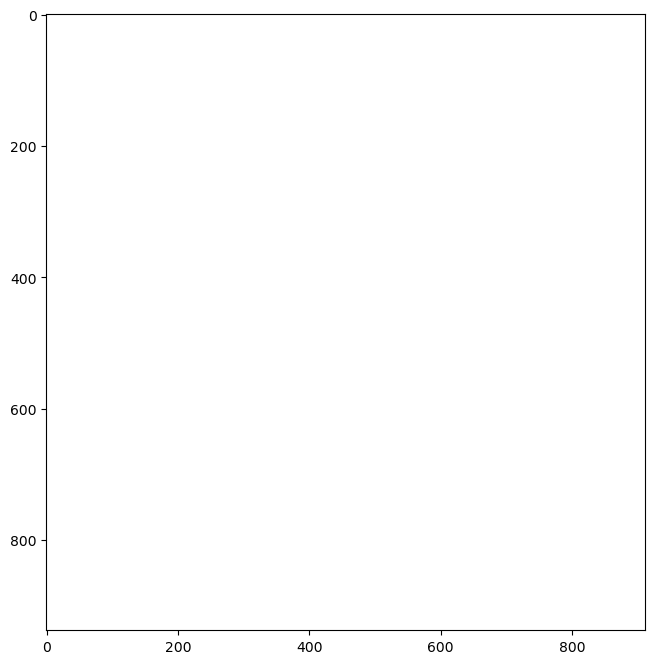

In [29]:

for i in range(2):
    c = cluster_center[i]
    l = labels[i]
    x, y, z = ratio[i]
    print(c[l].size)
    plt.figure(figsize = (15,8))
    print(x,y,z)
    plt.imshow(c[l].reshape(x)
    
# img = tf.keras.utils.load_img(f'./BrainTumorsData/brain_tumor_dataset/yes/Y100.jpg')
# img_array = tf.keras.utils.img_to_array(img)
# img_array = np.array([img_array])
# print(img_array)